In [106]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [189]:
head_list = ["nTracks","nShowers","nVertex","trkE","EmE","pidaLong","pidaShort","lenLong","lenShort","visE","pLong","trackEfrac","nFlashes","flashPE","sig"]
atmo = pd.read_csv("atmotree.csv",names=head_list,header=None,index_col=False)
pdk = pd.read_csv("pdktree.csv",names=head_list,header=None,index_col=False)

# Signal and background csvs are imported, as well as necessary libraries. Look to see they have expected behavior.

In [190]:
atmo.head()

,nTracks,nShowers,nVertex,trkE,EmE,pidaLong,pidaShort,lenLong,lenShort,visE,pLong,trackEfrac,nFlashes,flashPE,sig
0,4,3,8,0,0,2.80234,0.00000,32.28260,0.00000,0,0.181436,0.000000,2,4324.7500,0
1,2,0,3,0,0,7.25686,3.42414,22.88710,3.26208,0,0.155040,0.638613,2,65.1302,0
2,2,0,3,0,0,16.05470,24.33140,9.66974,2.66706,0,0.109716,0.365521,2,83.0714,0
3,2,0,3,0,0,9.95274,16.83320,27.91820,18.74930,0,0.169489,0.887705,2,78.9774,0
4,4,0,5,0,0,4.32084,3.04405,91.82640,5.22213,0,0.321967,0.000000,2,2062.8600,0


In [191]:
pdk.head()

,nTracks,nShowers,nVertex,trkE,EmE,pidaLong,pidaShort,lenLong,lenShort,visE,pLong,trackEfrac,nFlashes,flashPE,sig
0,2,0,3,0,0,6.58654,5.87317,48.6192,15.53310,0,0.222760,0.657262,2,1333.5800,1
1,2,0,3,0,0,8.64484,4.02827,51.2072,7.49073,0,0.228995,0.709013,2,564.0920,1
2,3,0,4,0,0,5.81910,39.44040,14.6574,3.74200,0,0.128947,0.298063,1,284.0100,1
3,2,0,3,0,0,10.86520,11.28500,34.3021,22.75140,0,0.186802,0.799846,3,92.4554,1
4,2,0,3,0,0,9.38759,9.70459,50.4080,12.87600,0,0.227076,0.868688,1,56.5050,1


In [207]:
pdk_df = atmo
pdk_df=pdk_df.append(pdk,ignore_index=True)
pdk_df=pdk_df.drop(["trkE","EmE","visE"],axis=1)

In [208]:
import seaborn as sb

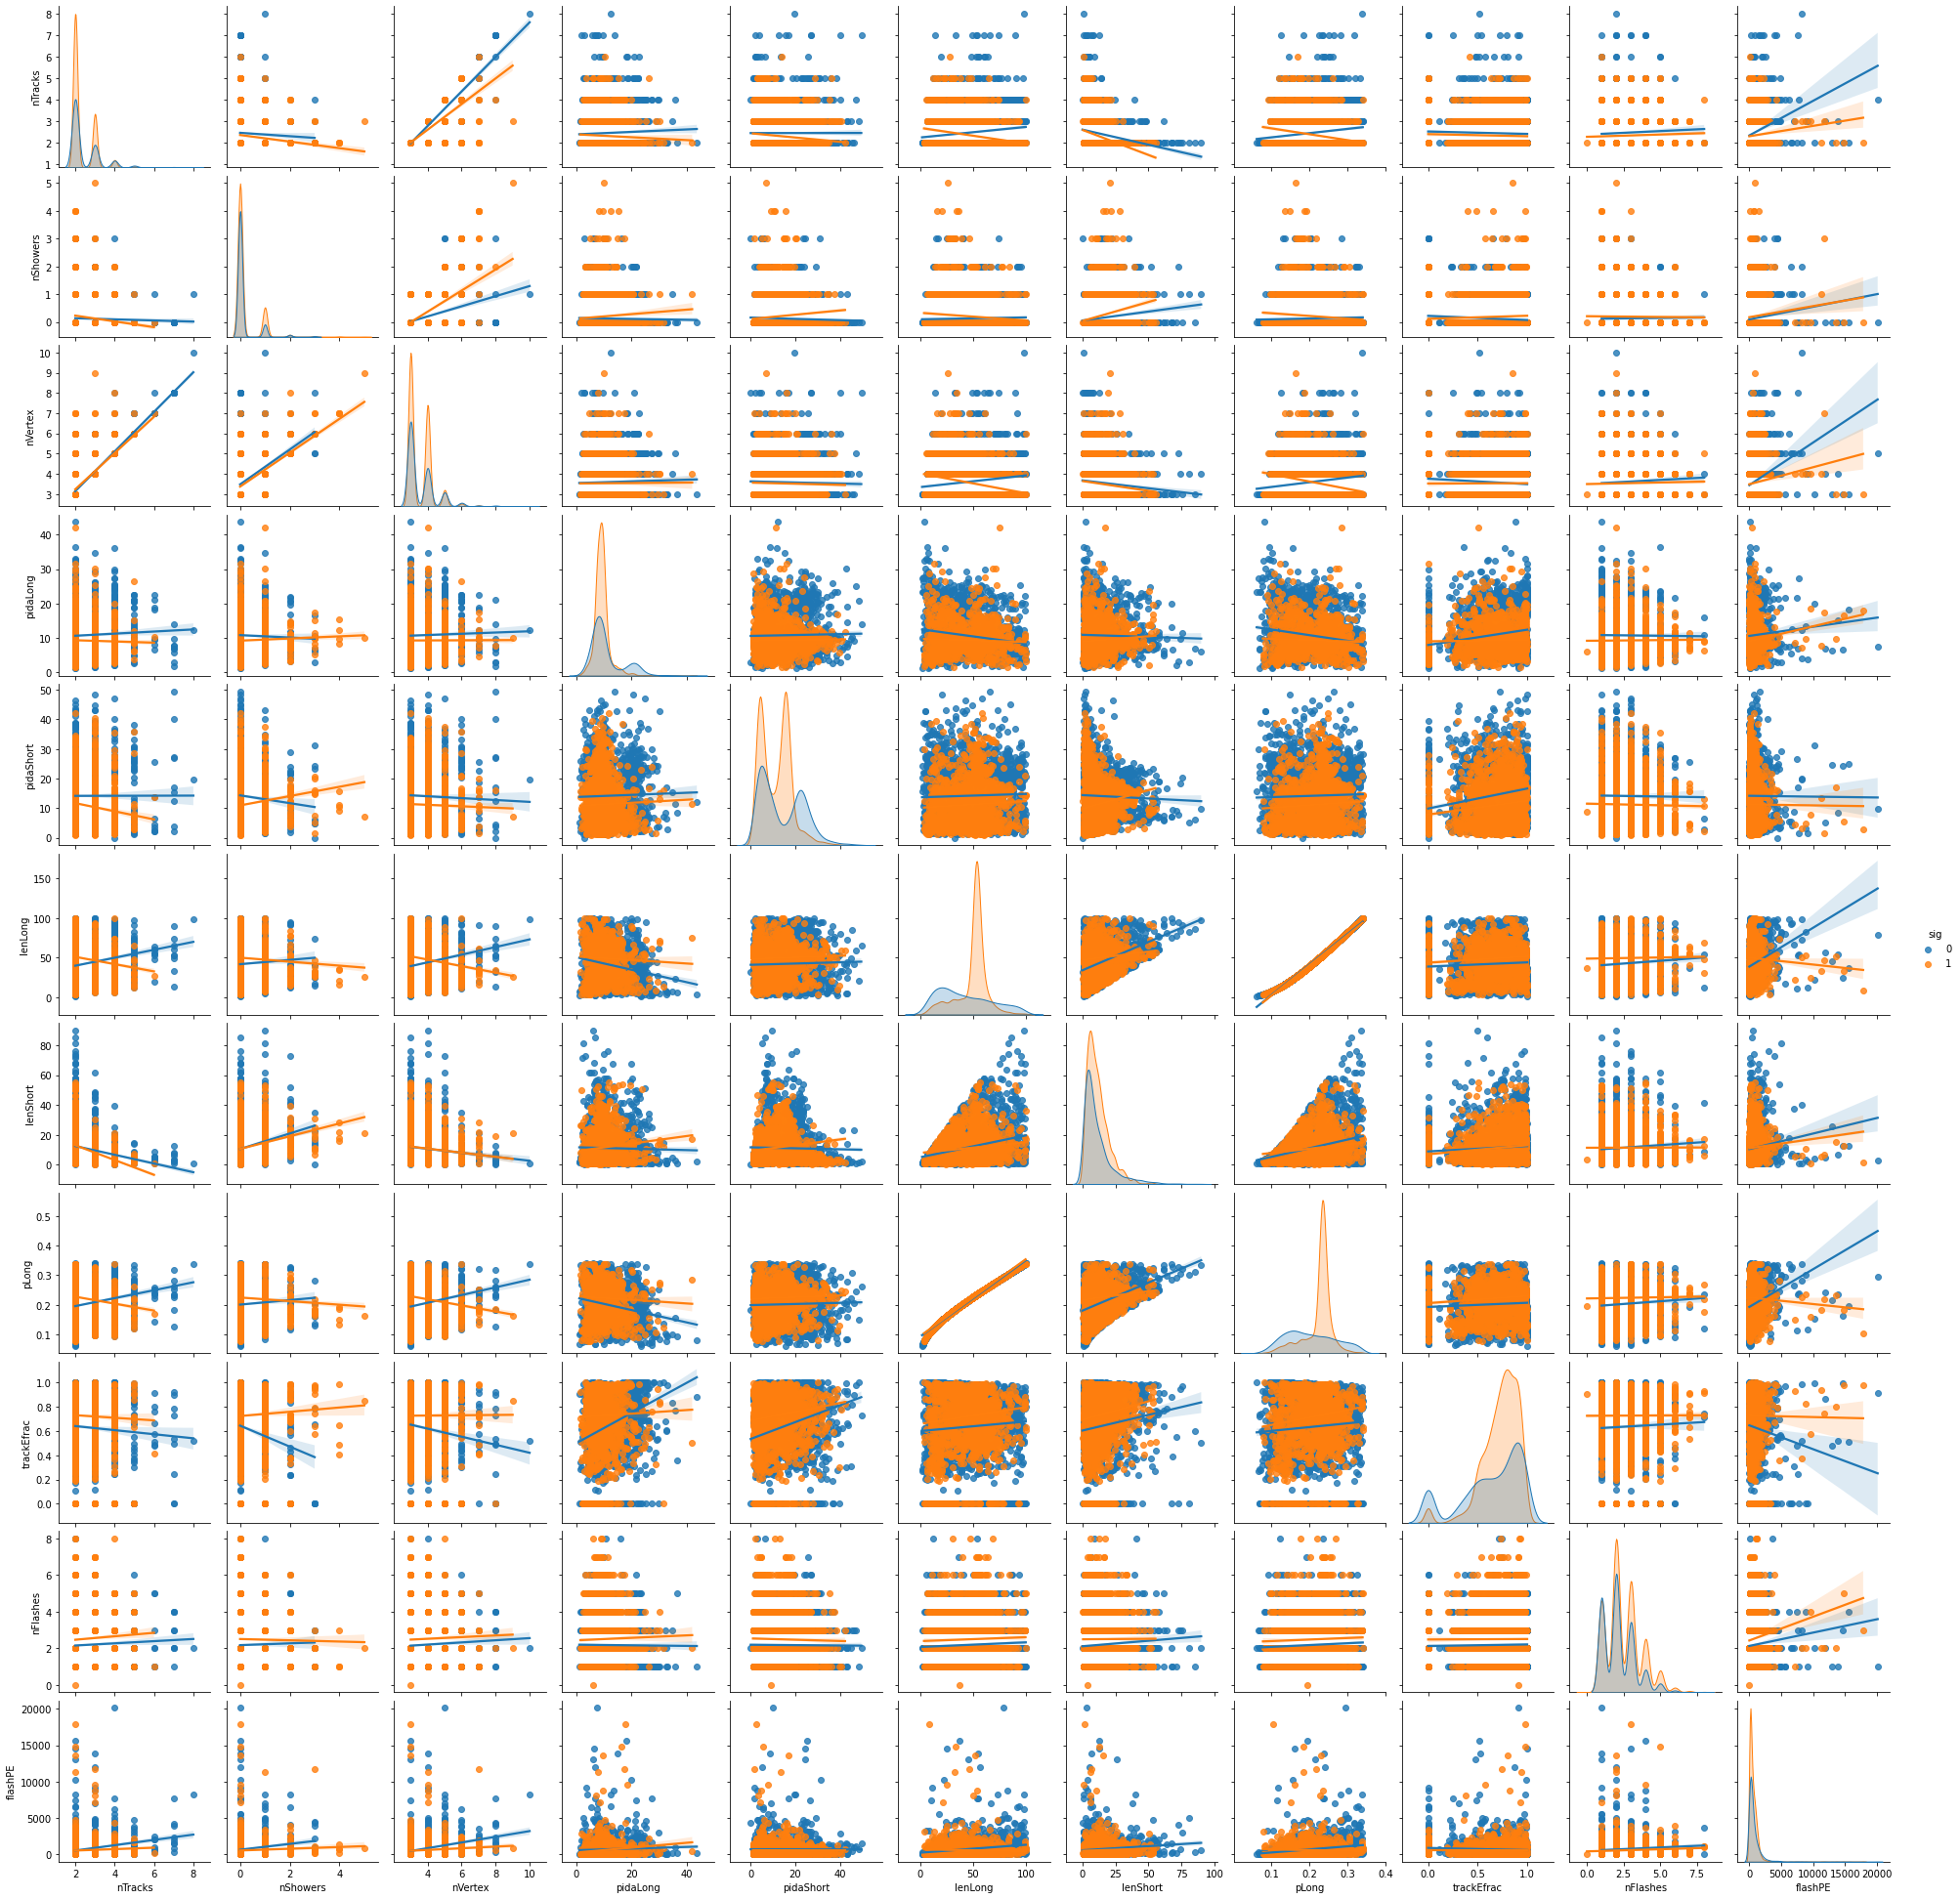

In [209]:
sb.pairplot(data=pdk_df,kind="reg",hue="sig")

In [198]:
pdk_target = pdk_df.sig
pdk_df=pdk_df.drop(["sig","trkE","EmE","visE"],axis=1)

# Pull off the "signal" column to use as the target for our ML models

In [199]:
pdk_target


0       0
1       0
2       0
3       0
4       0
       ..
5388    1
5389    1
5390    1
5391    1
5392    1
Name: sig, Length: 5393, dtype: int64

# Use 70% of the sample as a training set, and split here. Have a look to make sure it makes sense

In [200]:
X_train, X_test, y_train, y_test =train_test_split(pdk_df, pdk_target, test_size = 0.3)
X_train.head()

,nTracks,nShowers,nVertex,pidaLong,pidaShort,lenLong,lenShort,pLong,trackEfrac,nFlashes,flashPE
4580,2,1,4,10.14240,14.10320,52.3373,19.90920,0.231700,0.772538,5,1215.400
4807,3,0,4,9.07649,17.14950,52.3019,10.13620,0.231615,0.533434,1,855.849
2046,2,0,3,11.67290,24.78600,42.7081,2.90231,0.208273,0.403219,3,185.896
521,2,0,3,20.76080,15.62390,10.7885,4.95589,0.114381,1.000000,2,150.000
5146,2,0,3,8.26243,2.41721,52.4149,21.06160,0.231885,0.595814,2,176.359


In [201]:
y_train.head()

4580    1
4807    1
2046    0
521     0
5146    1
Name: sig, dtype: int64

In [202]:
from sklearn import tree
from sklearn import svm

# Here we make our ML models. First a decision tree, we do nothing special to it and let it find its own path

In [203]:
clf=tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

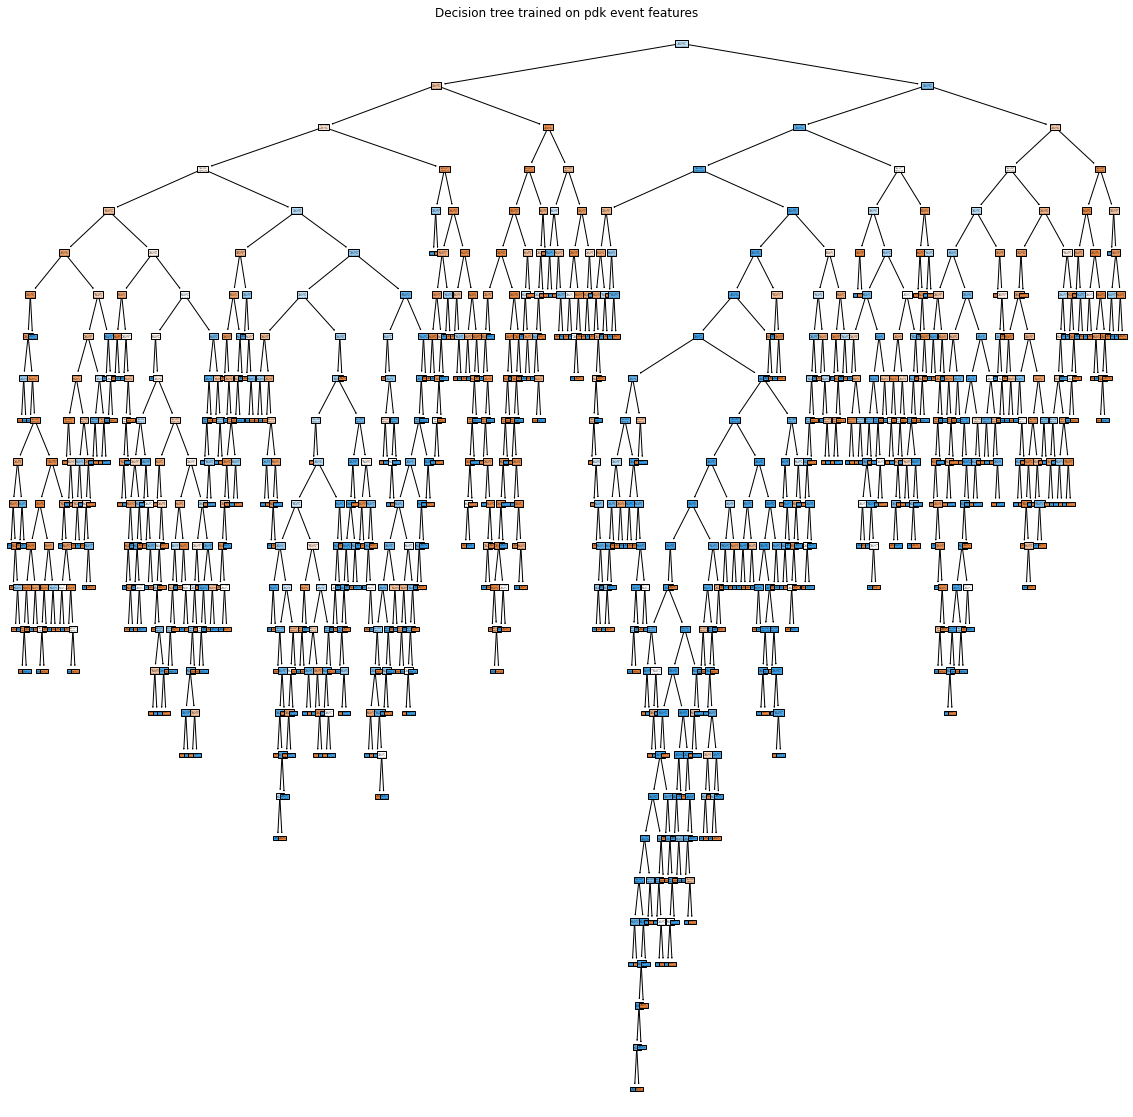

In [204]:
from sklearn.tree import plot_tree
plt.figure(figsize=[20,20])
plot_tree(clf, filled=True)
plt.title("Decision tree trained on pdk event features")
plt.show()

In [205]:
clf.predict(X_test)

array([1, 1, 1, ..., 0, 1, 0])

In [206]:
print("The score of the Decision tree classifier is ", clf.score(X_test,y_test))

The score of the Decision tree classifier is  0.7657601977750309


# Here we try a Gradient Boosting Classifier

In [120]:
from sklearn import ensemble

In [121]:
gbc = ensemble.GradientBoostingClassifier()

In [122]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [170]:
gbc.score(X_test,y_test)

0.8331273176761433

It does pretty okay, but can we improve some

In [171]:
clf.score(X_train,y_train)

1.0

In [210]:
gbc500 = ensemble.GradientBoostingClassifier(n_estimators=500)
gbc500.fit(X_train,y_train)
gbc500.score(X_test,y_test)

0.842398022249691

In [211]:
gbc5 = ensemble.GradientBoostingClassifier(learning_rate=.01,n_estimators=10000)
gbc5.fit(X_train,y_train)
gbc5.score(X_test,y_test)

0.8318912237330037

In [212]:
gbc5.feature_importances_

array([0.02071538, 0.00463504, 0.01669034, 0.10819809, 0.21475114,
       0.18542262, 0.07672926, 0.18435307, 0.11751185, 0.01024599,
       0.06074722])

In [136]:
svc = svm.NuSVC(gamma="auto")
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.6124845488257108

In [149]:
from sklearn.neural_network import MLPClassifier
nnCLF = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(10,10, 5,3,2), random_state=3)
nnCLF.fit(X_train,y_train)
nnCLF.score(X_test,y_test)

0.6903584672435105